<a href="https://colab.research.google.com/github/Goldfish0090/1stProject_june2022/blob/master/USL_Project_LearnerNotebook_FullCode%2B_282_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Security: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Reading the Dataset



In [2]:
# for mounting Google Drive to the notebook (to be used only if executing in Google Colab)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Unsupervised_learning/USL-Final_Project/stock_data.csv")

## Data Overview

- Observations
- Sanity checks

###Steps to get an overview of the dataset :

- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not.

- Get information about the number of rows and columns in the dataset.

- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

- Check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [6]:
data.shape

(340, 15)

Findings: Dataset has 340 rows and 15 columns

### Displaying few rows of the dataset

In [7]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


Findings: statistical summary of all numerical columns

### Checking the data types of the columns for the dataset

In [8]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

All columns with dtype object should be dtype category in order to conserve memory

### Creating a copy of original data

In [9]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking for duplicates and missing values

In [10]:
# checking for duplicate values
df.duplicated().sum()

0

Findings: There are no duplicated value in the dataset.

In [11]:
# checking for missing values in the data
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

Findings: There are no missing value in the dataset.

In [12]:
# convert all columns with dtype object into category
for col in df.columns[df.dtypes=='object']:
    df[col] = df[col].astype('category')

In [ ]:
# dropping the ticker symbol column, as it does not provide any information
df.drop("Ticker Symbol", axis=1, inplace=True)

In [ ]:
# checking the column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Security                      340 non-null    category
 1   GICS Sector                   340 non-null    category
 2   GICS Sub Industry             340 non-null    category
 3   Current Price                 340 non-null    float64 
 4   Price Change                  340 non-null    float64 
 5   Volatility                    340 non-null    float64 
 6   ROE                           340 non-null    int64   
 7   Cash Ratio                    340 non-null    int64   
 8   Net Cash Flow                 340 non-null    int64   
 9   Net Income                    340 non-null    int64   
 10  Earnings Per Share            340 non-null    float64 
 11  Estimated Shares Outstanding  340 non-null    float64 
 12  P/E Ratio                     340 non-null    floa

### Statistical summary of the dataset

In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,3M Company,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.


**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate analysis

In [14]:
#create list of columns with numerical variables
num_col = df.select_dtypes(include=np.number).columns.tolist()

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`Current Price`**

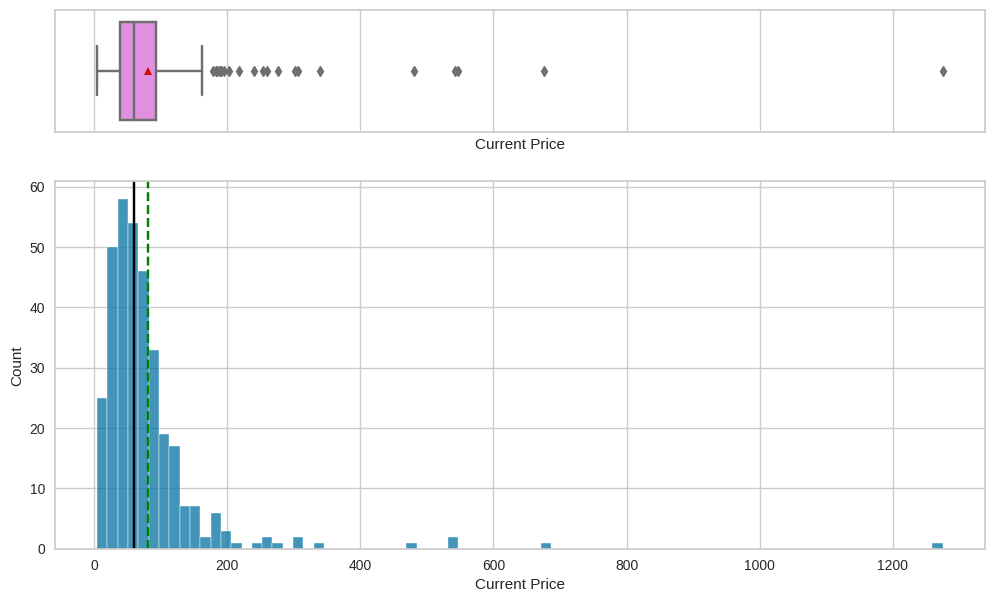

In [16]:
histogram_boxplot(df, 'Current Price')

###Findings:
Current price

The distribution is heavily right skewed, with 49 of the 340 stocks having twice the median value of all stocks
As expected, no stock is listed at less of less than 0 dollars

**`Price Change`**

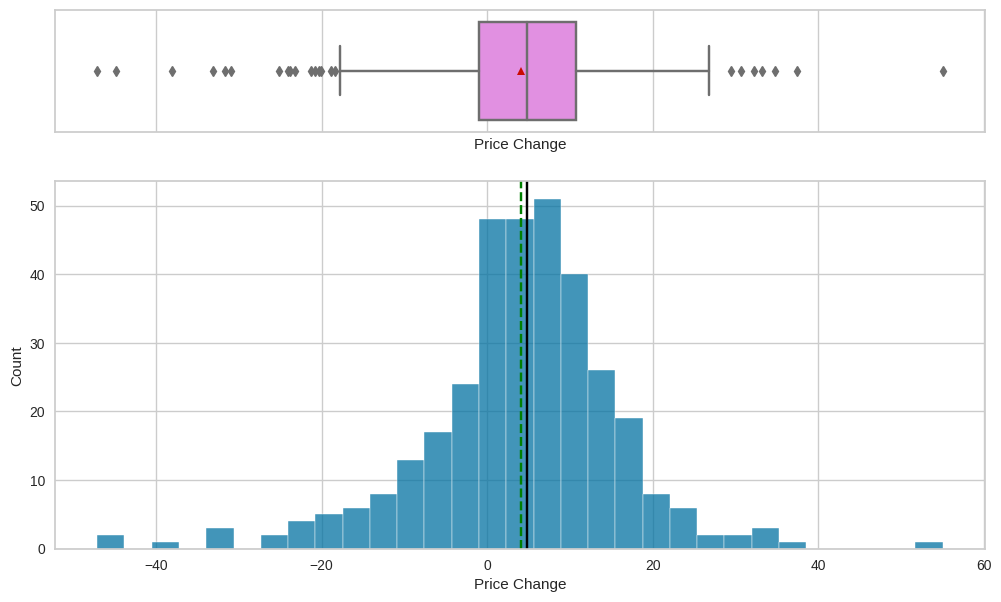

In [17]:
histogram_boxplot(df, 'Price Change')

###Findings:
Price change

The distribution is biased towards lower volatilities, but long tails do exist both for positive and negative price changes
The most volatile stocks show as low as a 48% decrease to as high as a 52% increase over 13 weeks

**`Volatility`**

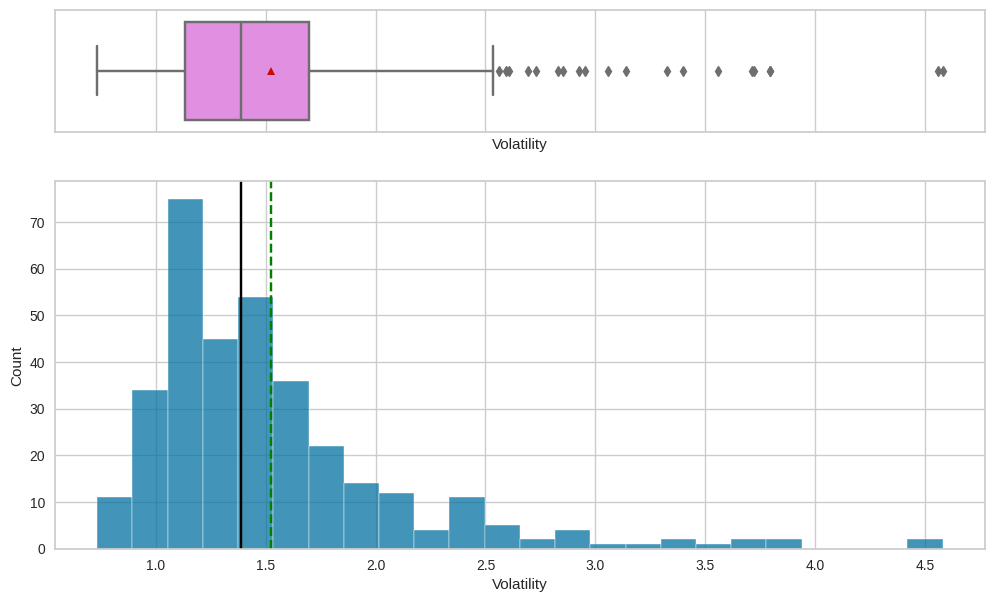

In [18]:
histogram_boxplot(df, 'Volatility')

Findings:
Volatility

As expected, the distribution of standard deviations is right skewed and not normal.The meadian of volatility is 1.4

**`ROE`**

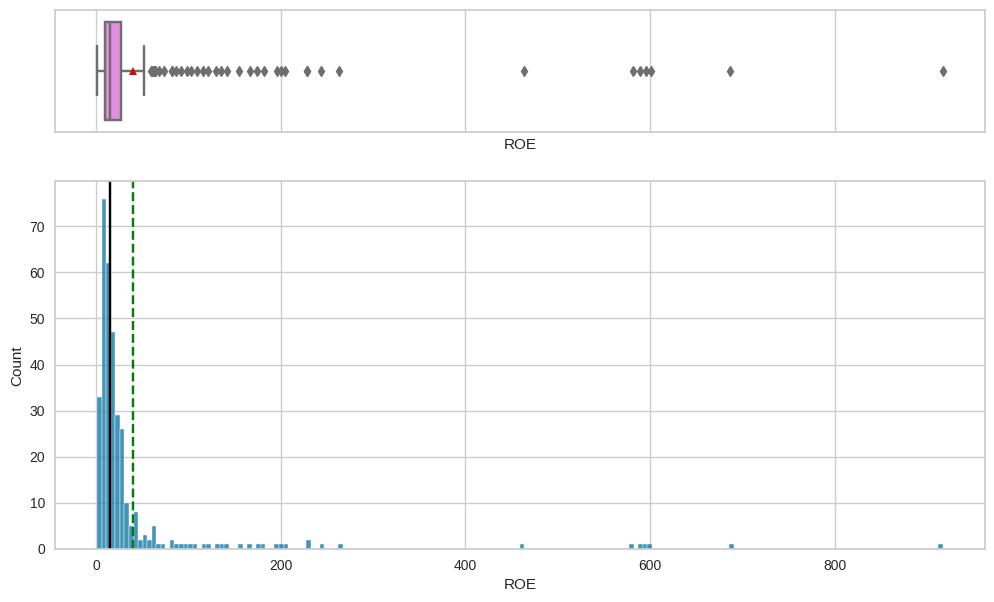

In [19]:
histogram_boxplot(df, 'ROE')

###Findings:
Distributions are heavily right skewed and no stock is listed with either metric with a value of less than 0

**`Cash Ratio`**

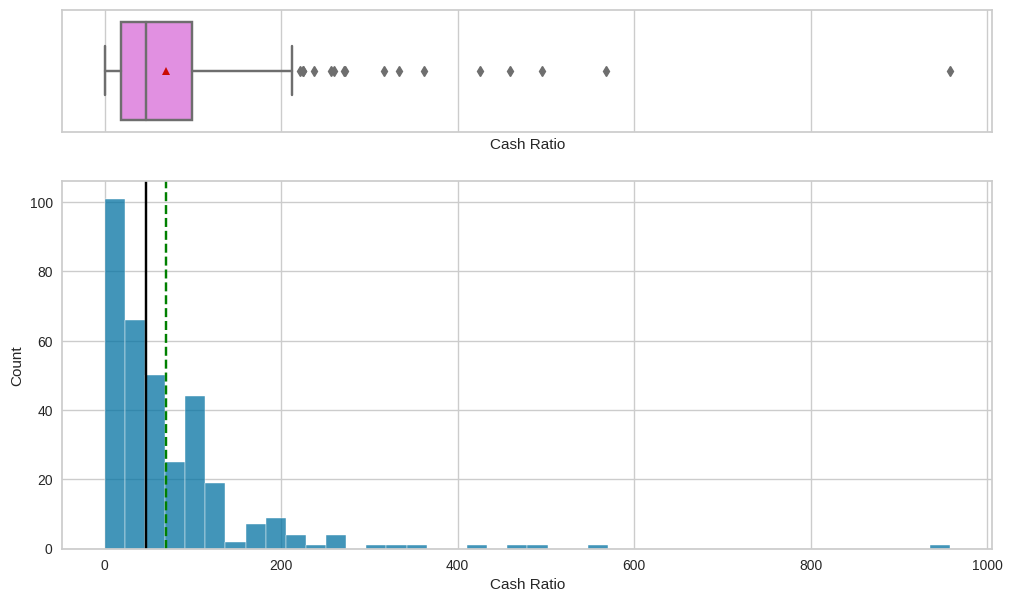

In [20]:
histogram_boxplot(df, 'Cash Ratio')

###Findings:
As expected, distributions are heavily right skewed

**`Net Cash Flow`**

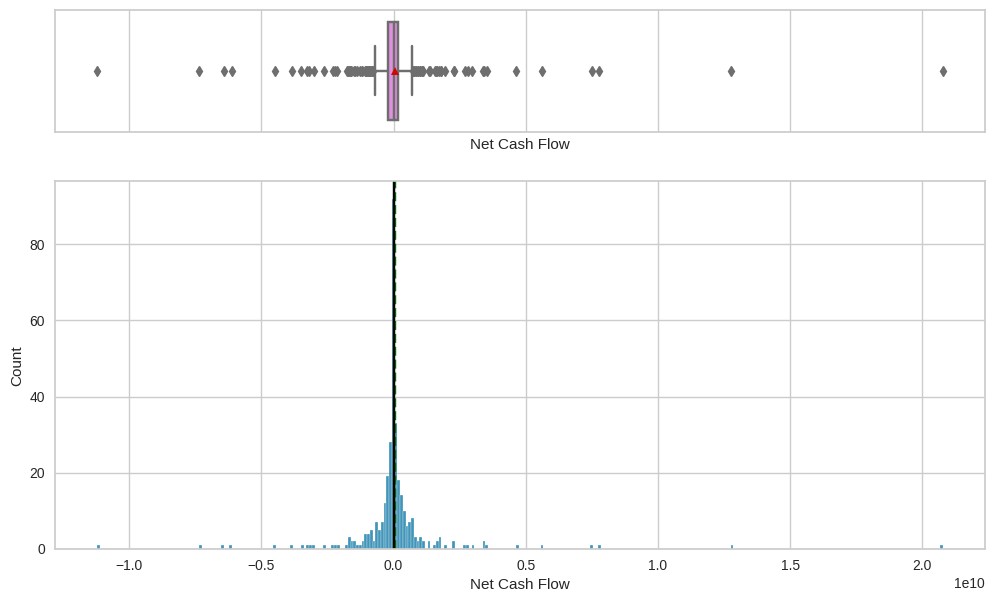

In [21]:
histogram_boxplot(df, 'Net Cash Flow')

**`Net Income`**

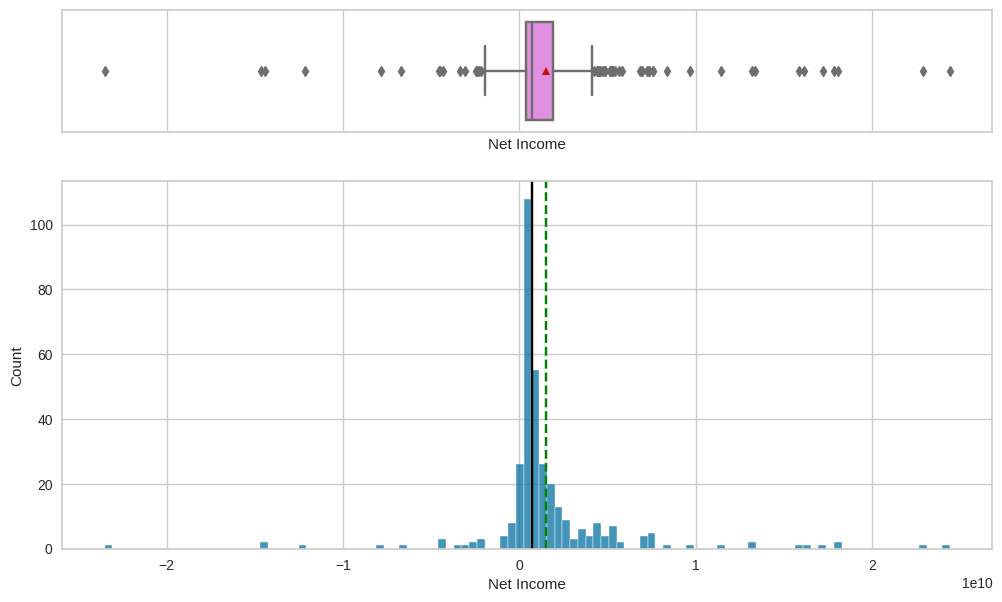

In [22]:
histogram_boxplot(df, 'Net Income')

###Findings:
Net Income

As expected, net income is shown to be right skewed with both long positive and negative tails. Most companies generate meager profits, but some are failing and some are highly successful.
28 companies within the dataset are showing a net income of less than 0 dollars


**`Earnings Per Share`**

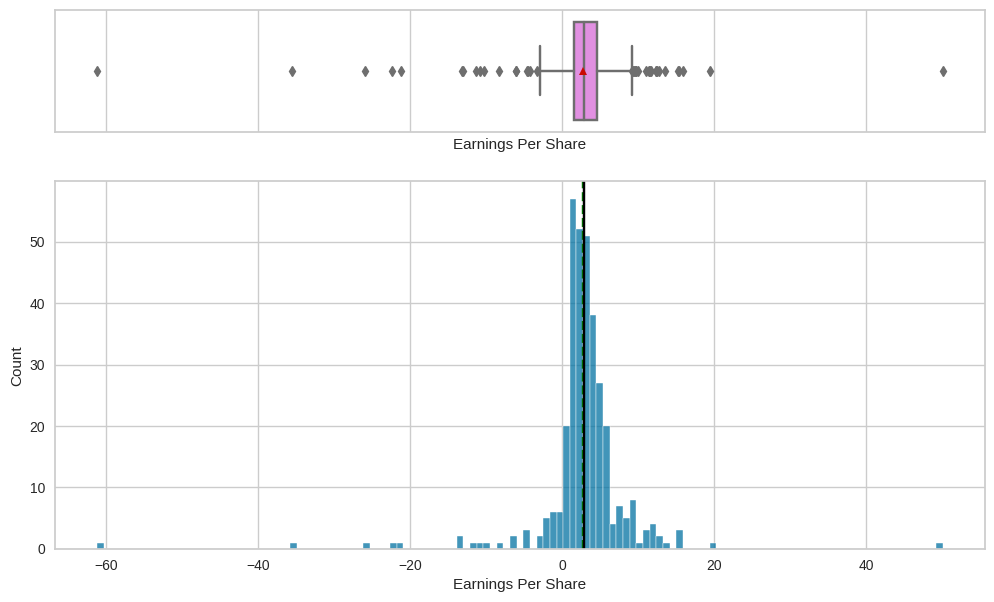

In [23]:
histogram_boxplot(df, 'Earnings Per Share')

###Findings:
EPS shows a similar distribution like  Net Income. It  shows some positive values and a few stocks showing negative values



**`Estimated Shares Outstanding`**

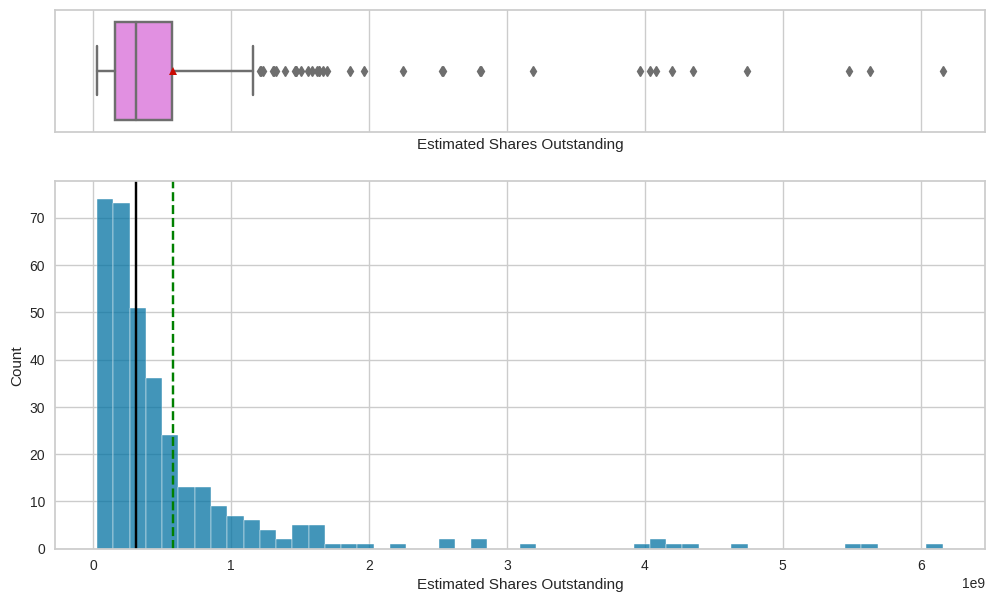

In [24]:
histogram_boxplot(df, 'Estimated Shares Outstanding')

###Findings:
Estimated shares outstanding

The distribution is highly right skewed, but no stock has a value of outstanding shares that is unrealistic

**`P/E Ratio`**

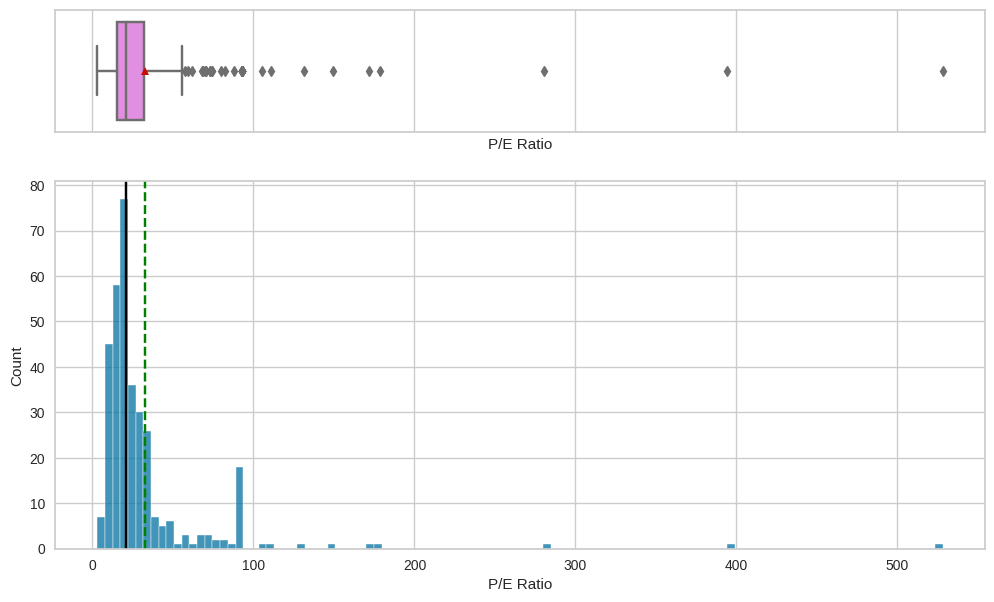

In [25]:
histogram_boxplot(df, 'P/E Ratio')

###Findings:

P/E Ratio

The distribution of P/E ratios is highly right skewed
Interestingly, no stock shows a negative ratio, even though several stocks have a negative EPS and no stock stock has a price listed of less than 0



**`P/B Ratio`**

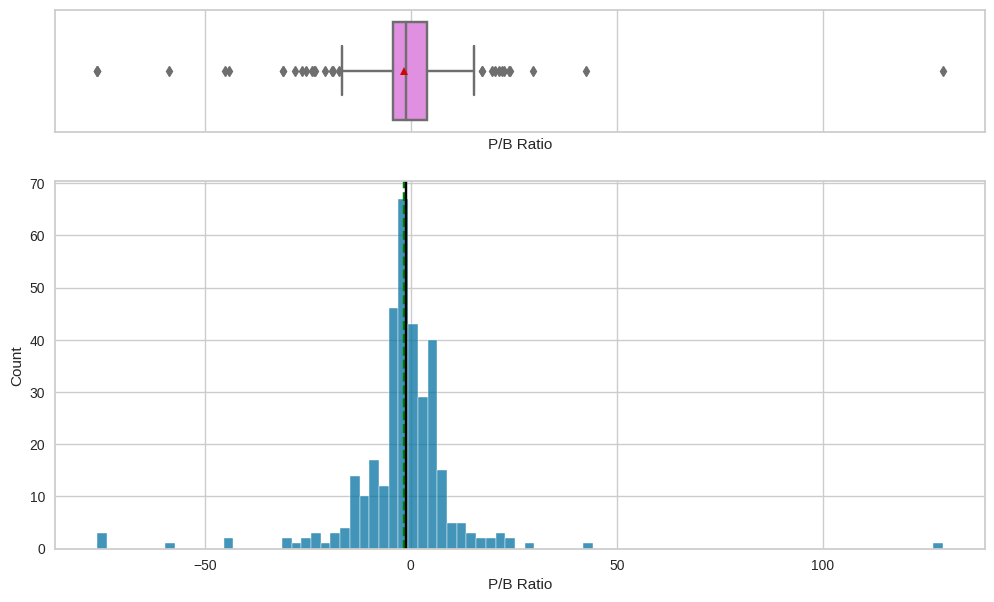

In [26]:
histogram_boxplot(df, 'P/B Ratio')

###Findings:

P/B Ratio

The distribution for P/B ratios is mostly centered around 0 but with long positive and negative


In [27]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

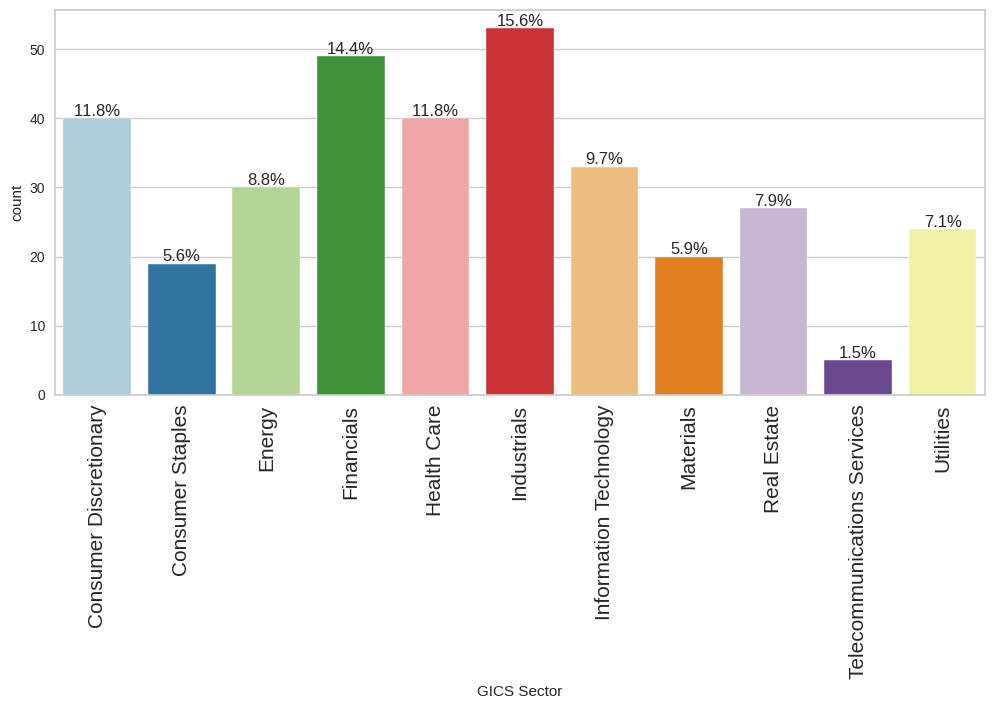

In [28]:
labeled_barplot(df, 'GICS Sector', perc=True)

In [29]:
#display the five sectors with the most number of stocks
df["GICS Sector"].value_counts().head(n=5)


Industrials               53
Financials                49
Consumer Discretionary    40
Health Care               40
Information Technology    33
Name: GICS Sector, dtype: int64

###Findings:

The stocks are drawn from 11 different industrial sectors, with comprising less than 16% of the dataset.
The top 4 of the 11 sectors (industrials, financials, consumer discretionary, and health care) comprise over half of the total number of stocks

**`GICS Sub Industry`**

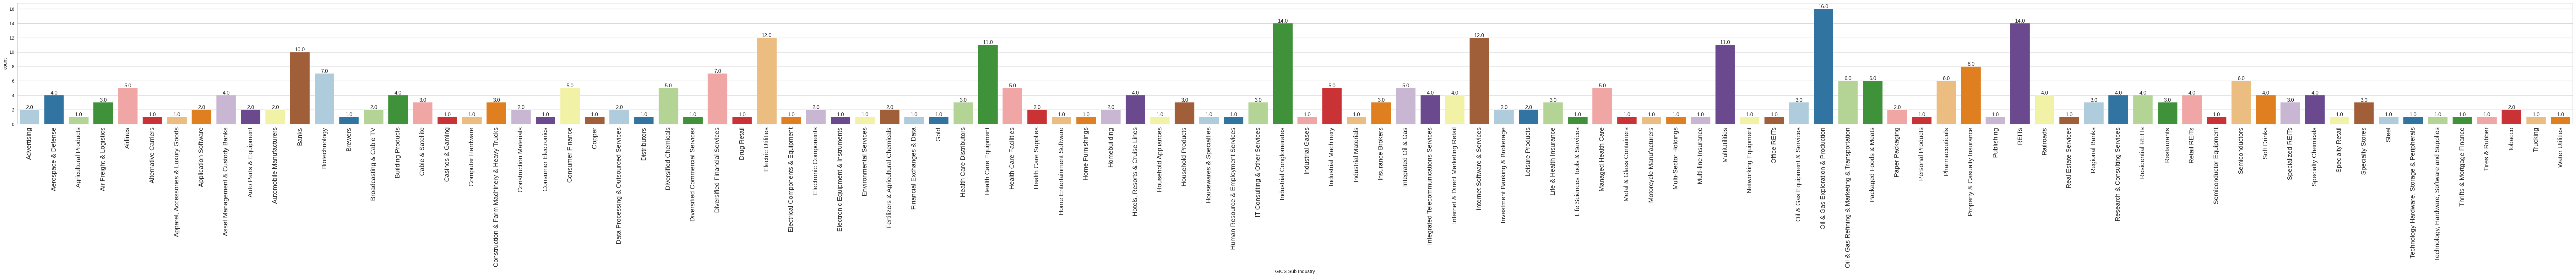

In [30]:
labeled_barplot(df,'GICS Sub Industry')

In [31]:
#display the five sub industries with the most number of stocks
df['GICS Sub Industry'].value_counts().head(n=5)

Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Internet Software & Services          12
Electric Utilities                    12
Name: GICS Sub Industry, dtype: int64

###Findings:

The dataset is comprised of stocks from 68 different subindustries, with no subindustry having more than 16 stocks in the dataset.
These observations indicate that the 340 stocks held within the dataset are highly diversified across sectors and subindustries.

### Bivariate Analysis

##How are the different variables correlated with each other?

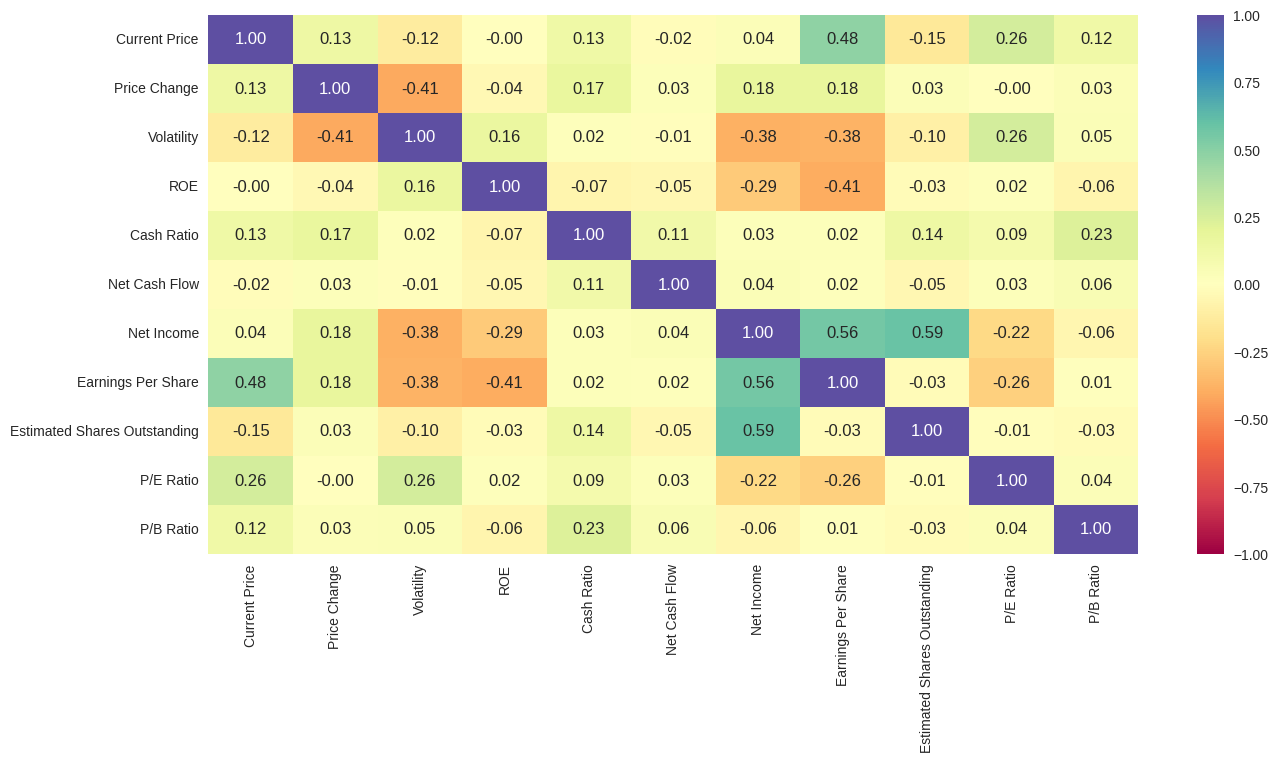

In [32]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

###Findings:

Several variables are moderately correlated (+/- .40) with one another


1. Volatility is negatively correlated with price change, i.e., If a stock grows more volatile, its price is likely to fluctuate.
2. Net income is negatively correlayed with volatility, i.e. as a company generates higher net income its price is likely less volatile.
3. Net income is also positively correlated with earnings per share (EPS) and estimated shares outstanding.
4. EPS is positively correlated with current price, i.e. as a company's EPS rises, its prices is also highly likely to increase.
5. EPS is also negatively correlated with ROE, i.e. as a company generates more equity for shareholders, an equivalent amount of net income the following periods will generate a lower return

## Which economic sector have seen the maximum price increase on average?
**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

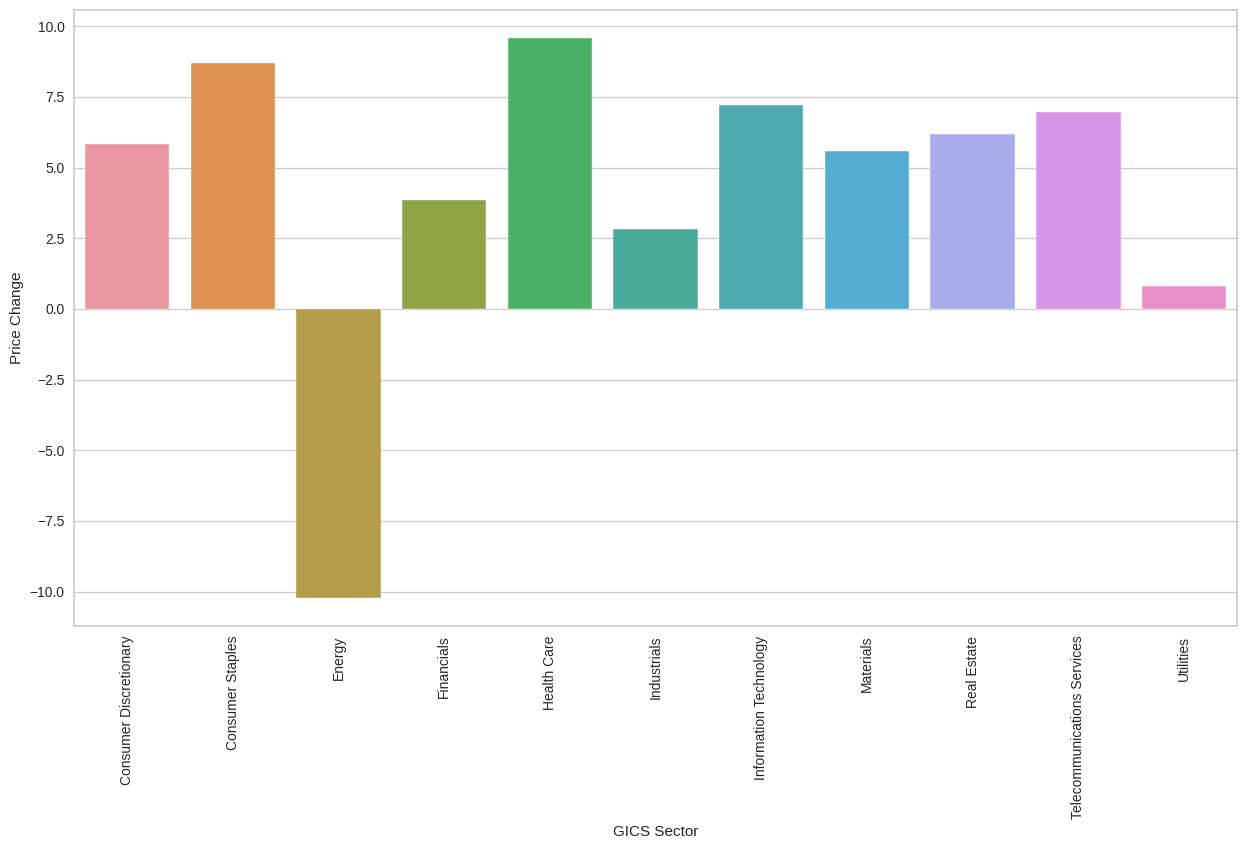

In [33]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

In [34]:
df.groupby('GICS Sector')['Price Change'].mean().sort_values()

GICS Sector
Energy                        -10.228289
Utilities                       0.803657
Industrials                     2.833127
Financials                      3.865406
Materials                       5.589738
Consumer Discretionary          5.846093
Real Estate                     6.205548
Telecommunications Services     6.956980
Information Technology          7.217476
Consumer Staples                8.684750
Health Care                     9.585652
Name: Price Change, dtype: float64

###Findings:

Health care sectors have shown the highest average price increase over the preeceding period.


##How does the average cash ratio vary across economic sectors?

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

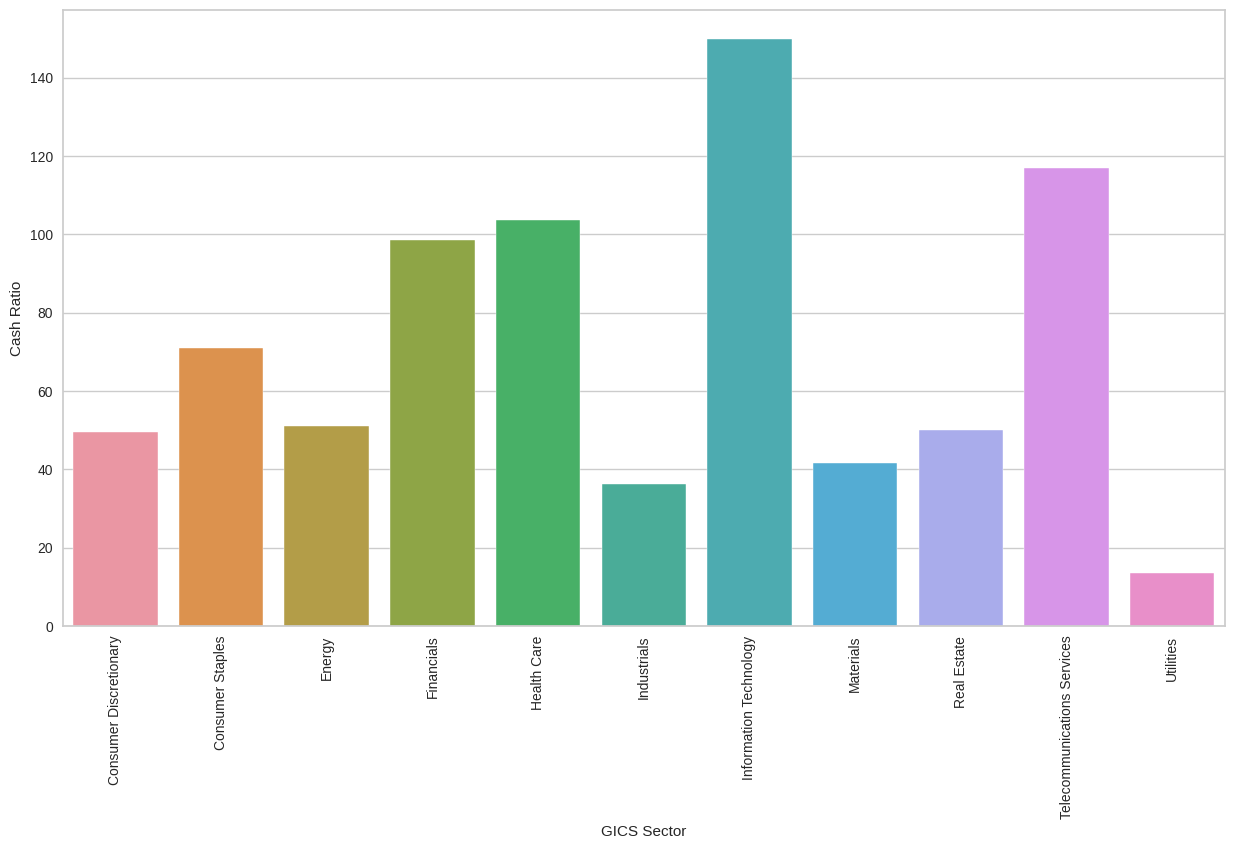

In [35]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

In [36]:
df.groupby('GICS Sector')['Cash Ratio'].mean().sort_values(ascending=False)

GICS Sector
Information Technology         149.818182
Telecommunications Services    117.000000
Health Care                    103.775000
Financials                      98.591837
Consumer Staples                70.947368
Energy                          51.133333
Real Estate                     50.111111
Consumer Discretionary          49.575000
Materials                       41.700000
Industrials                     36.188679
Utilities                       13.625000
Name: Cash Ratio, dtype: float64

###Findings:

IT and Telecommunications sectors, both relatively newer and unregulated industries, are able to generate significantly higher average cash ratios than their peer sectors.
Utilities, a highly regulated industry, generates the lowest average cash ratios of all sectors

##How does the P/E ratio vary, on average, across economic sectors?

P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.

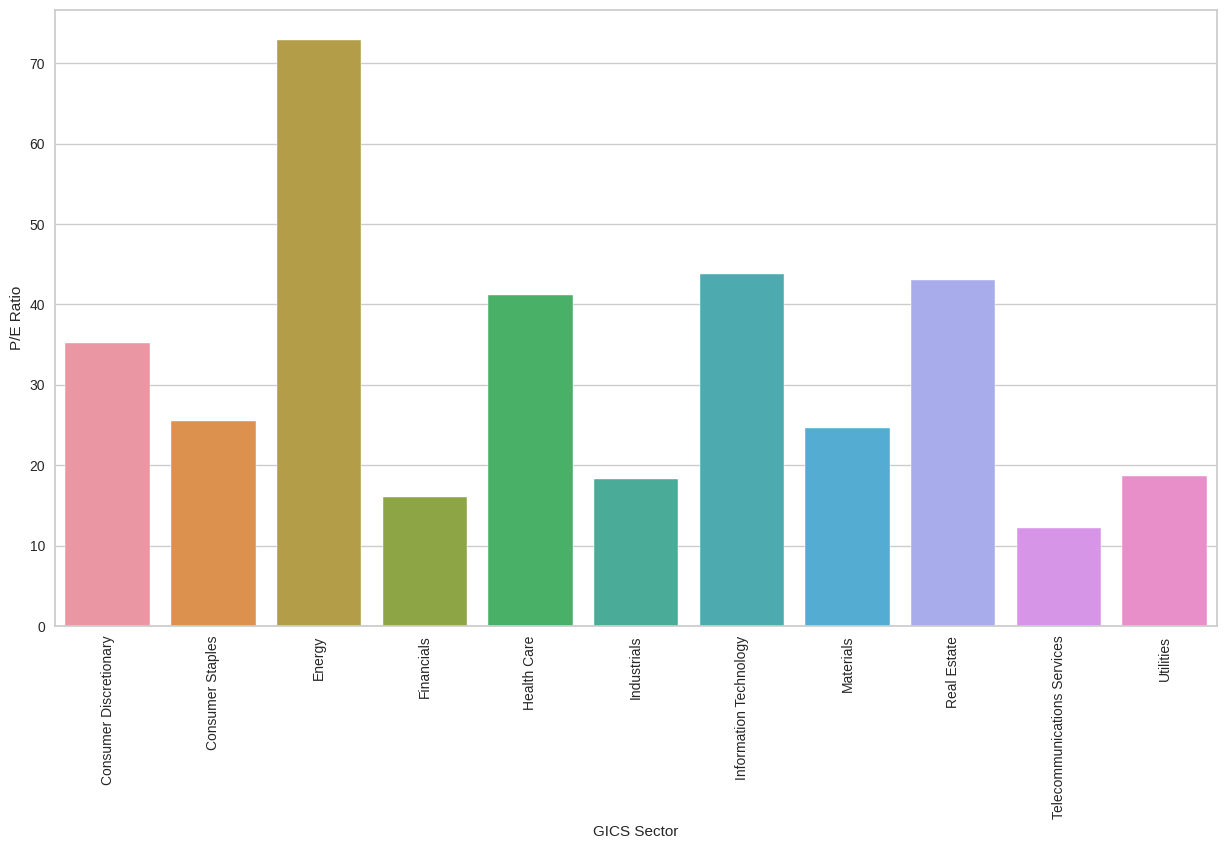

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

In [38]:
df.groupby('GICS Sector')['P/E Ratio'].mean().sort_values(ascending=False)

GICS Sector
Energy                         72.897709
Information Technology         43.782546
Real Estate                    43.065585
Health Care                    41.135272
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Materials                      24.585352
Utilities                      18.719412
Industrials                    18.259380
Financials                     16.023151
Telecommunications Services    12.222578
Name: P/E Ratio, dtype: float64

###Findings:

Energy companies have the highest average P/E ratios of all sectors by a considerable margin, with telecoms having the lowest average P/E ratios

##How does the Volatility varies across economic sectors?

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

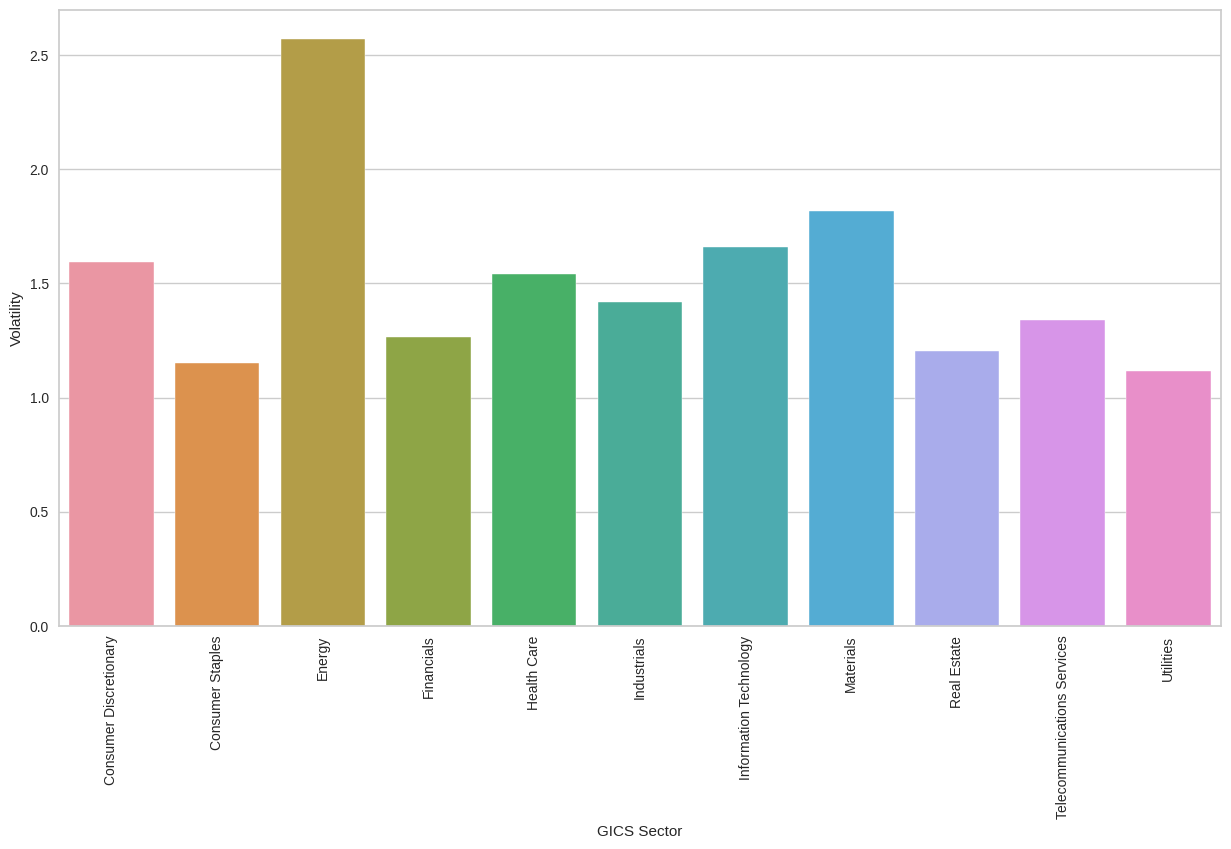

In [39]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

In [40]:
df.groupby('GICS Sector')['Volatility'].mean().sort_values(ascending=False)

GICS Sector
Energy                         2.568777
Materials                      1.816726
Information Technology         1.659801
Consumer Discretionary         1.595478
Health Care                    1.541023
Industrials                    1.416989
Telecommunications Services    1.341612
Financials                     1.267255
Real Estate                    1.206053
Consumer Staples               1.152675
Utilities                      1.118018
Name: Volatility, dtype: float64

###Findings:

Energy companies have the highest volatility of all sectors by a considerable margin.

## Data Preprocessing
Steps of data processing are as follows:

- Duplicate value check (already done)
- Missing value treatment (already done)
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

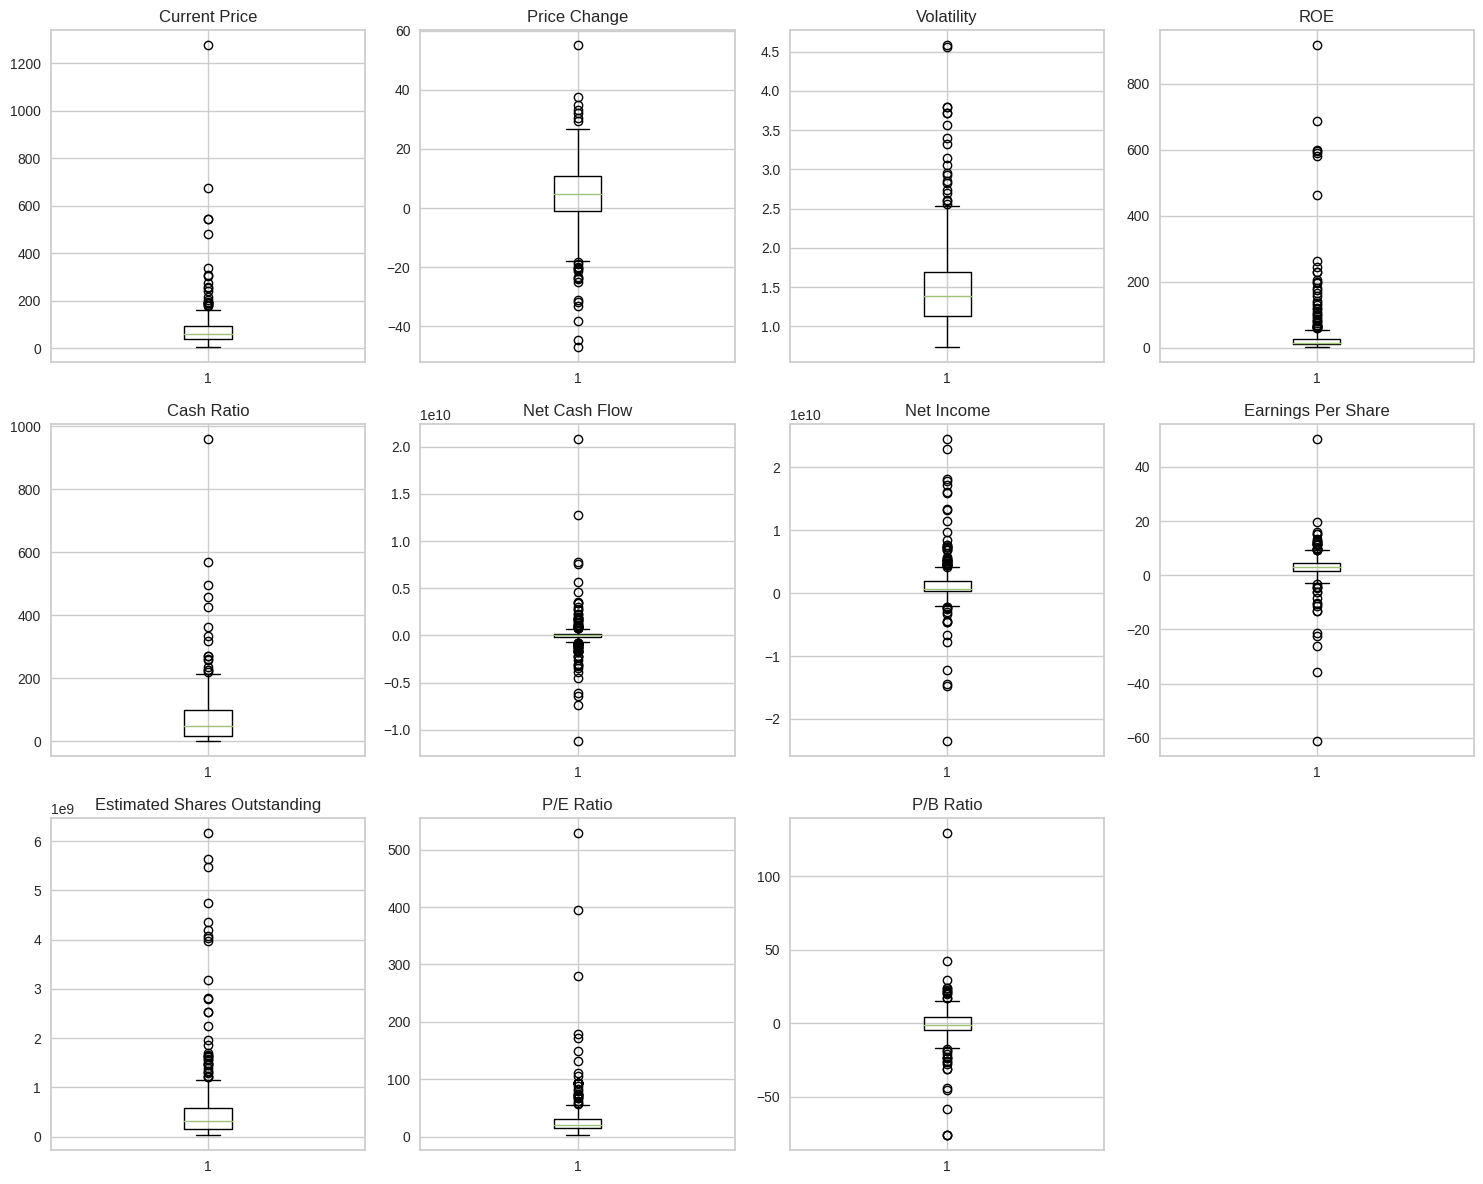

In [41]:
plt.figure(figsize=(15, 12))

num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

###Findings:
Variables contain a few or several outliers; however, none of these values appear to be unrealistic.Since those are original data, we will not do outliers treatment.

### Scaling

- Let's scale the data before we proceed with clustering.

In [42]:
# scaling the data before clustering
scaler = StandardScaler()

subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [44]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

### Checking Elbow Plot

In [45]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.266871451330431
Number of Clusters: 4 	Average Distortion: 2.175554082632614
Number of Clusters: 5 	Average Distortion: 2.1059351899972185
Number of Clusters: 6 	Average Distortion: 2.069402881418923
Number of Clusters: 7 	Average Distortion: 2.0156803260709855
Number of Clusters: 8 	Average Distortion: 1.9801476404995824
Number of Clusters: 9 	Average Distortion: 1.9393696573387345
Number of Clusters: 10 	Average Distortion: 1.857936804243452


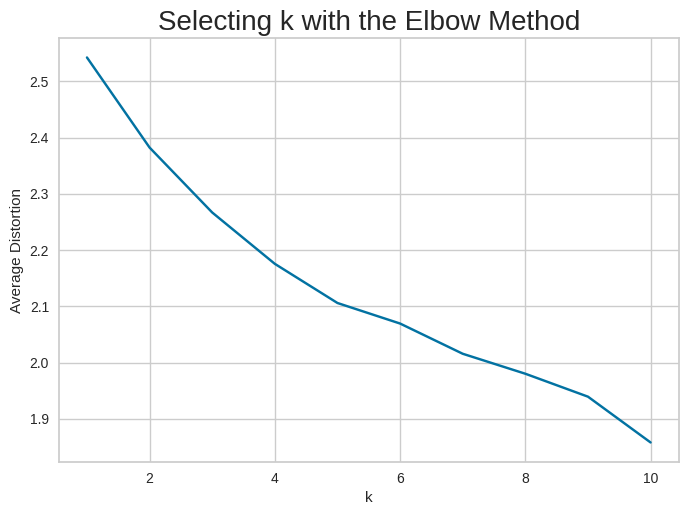

In [46]:
clusters = range(1,11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=45)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

###Finding
Elbow is prominent at cluster 5.

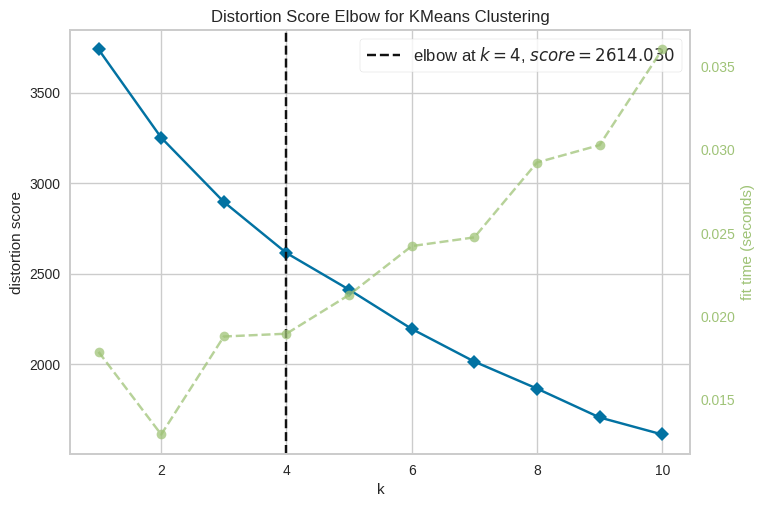

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
model = KMeans(random_state=42) #random_state =42 is used as it is more stable
visualizer = KElbowVisualizer(model, k=(1, 11), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.45797710447228496)
For n_clusters = 4, the silhouette score is 0.45017906939331087)
For n_clusters = 5, the silhouette score is 0.4599352800740646)
For n_clusters = 6, the silhouette score is 0.3985379248608659)
For n_clusters = 7, the silhouette score is 0.3868475076242907)
For n_clusters = 8, the silhouette score is 0.3886929719130642)
For n_clusters = 9, the silhouette score is 0.40581042332267614)
For n_clusters = 10, the silhouette score is 0.18011528994705786)


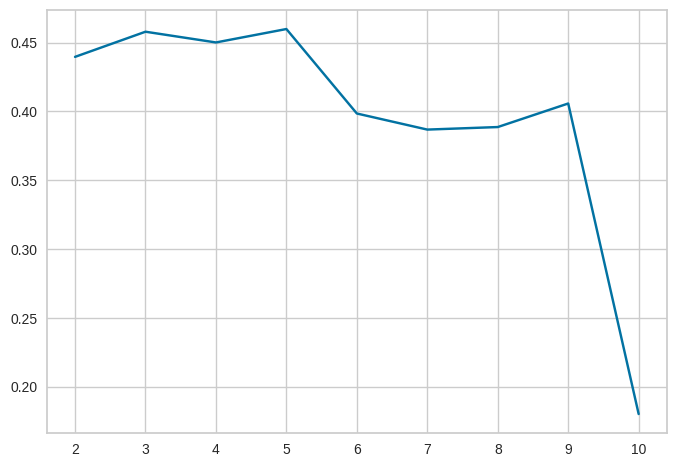

In [48]:
sil_score = []
cluster_list = range(2, 11)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

###Findings:

We got highest the silhouette score for cluster 5

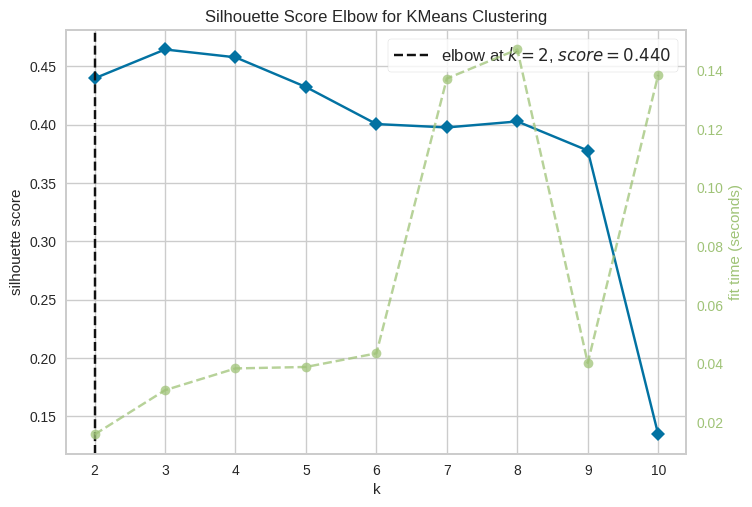

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [49]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

###Findings:

We got highest score for cluster 5

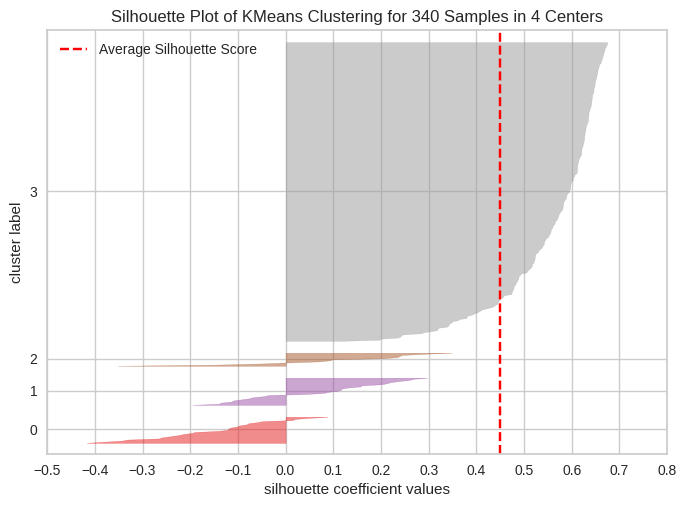

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [50]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=42))
visualizer.fit(k_means_df)
visualizer.show()

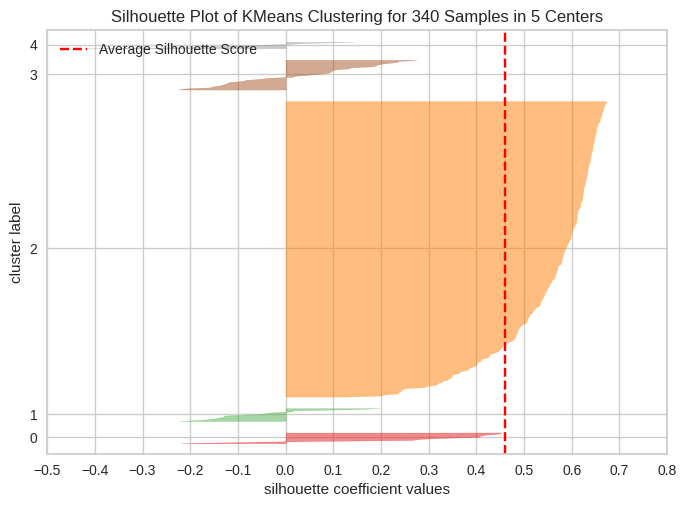

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [51]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=42))
visualizer.fit(k_means_df)
visualizer.show()

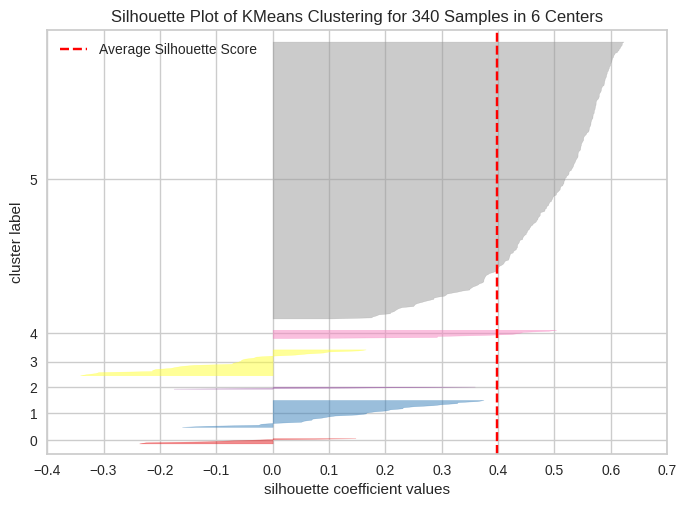

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [52]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=42))
visualizer.fit(k_means_df)
visualizer.show()

###Conclusion:
As we find in KMean Elbow method Cluster 5 create significant elbow and and from Silhouette score we find cluster 5 gives the highest score. So, We select 5 cluster for the model.

### Creating Final Model

In [53]:
# final K-means model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(k_means_df)

KMeans(n_clusters=5, random_state=42)

In [54]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [55]:
km_cluster_profile = df1.groupby("KM_segments").mean()

In [56]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values
)

In [57]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,50.477272,5.588148,1.141171,31.545455,64.181818,-2581727272.727273,14675545454.545454,4.490909,4012176129.000000,14.010093,-5.356393,11
1,81.418719,10.536341,1.578634,17.000000,367.538462,3857062692.307693,3129067846.153846,2.197692,1334755181.584615,65.639418,6.235848,13
2,73.769121,5.466467,1.392827,34.632143,55.710714,4183132.142857,1443269353.571429,3.629625,430217149.035393,24.132318,-3.203999,280
3,38.808966,-13.680395,2.938240,106.034483,55.551724,-189825655.172414,-3578126517.241379,-8.657586,463121182.880690,85.946813,1.888901,29
4,585.527134,7.752090,1.508020,17.571429,159.142857,210520428.571429,804590428.571429,14.410000,116080574.760000,118.763084,33.713020,7


In [58]:
## Complete the code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique().to_list())
    print()

In cluster 2, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Archer-Daniels-Midland Co', 'Ameren Corp', 'American Electric Power', 'AFLAC Inc', 'American International Group, Inc.', 'Apartment Investment & Mgmt', 'Assurant Inc', 'Arthur J. Gallagher & Co.', 'Akamai Technologies Inc', 'Albemarle Corp', 'Alaska Air Group Inc', 'Allstate Corp', 'Allegion', 'Applied Materials Inc', 'AMETEK Inc', 'Affiliated Managers Group Inc', 'Ameriprise Financial', 'American Tower Corp A', 'AutoNation Inc', 'Anthem Inc.', 'Aon plc', 'Amphenol Corp', 'Arconic Inc', 'Activision Blizzard', 'AvalonBay Communities, Inc.', 'Broadcom', 'American Water Works Company Inc', 'American Express Co', 'Boeing Company', 'Baxter International Inc.', 'BB&T Corporation', 'Bard (C.R.) Inc.', 'BIOGEN IDEC Inc.', 'The Bank of New York Mellon Corp.', 'Ball Corp', 'Bristol-Myers Squibb', 'Boston Scientific', 'BorgWarner', 'Boston Properties', 'Caterpillar

In [59]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary          2
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Industrials                     0
             Information Technology          0
             Materials                       0
             Real Estate                     0
             Telecommunications Services     2
             Utilities                       0
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      1
             Health Care                     4
             Industrials                     0
             Information Technology          4
             Materials                       0
             Real Estate                     0
             Teleco

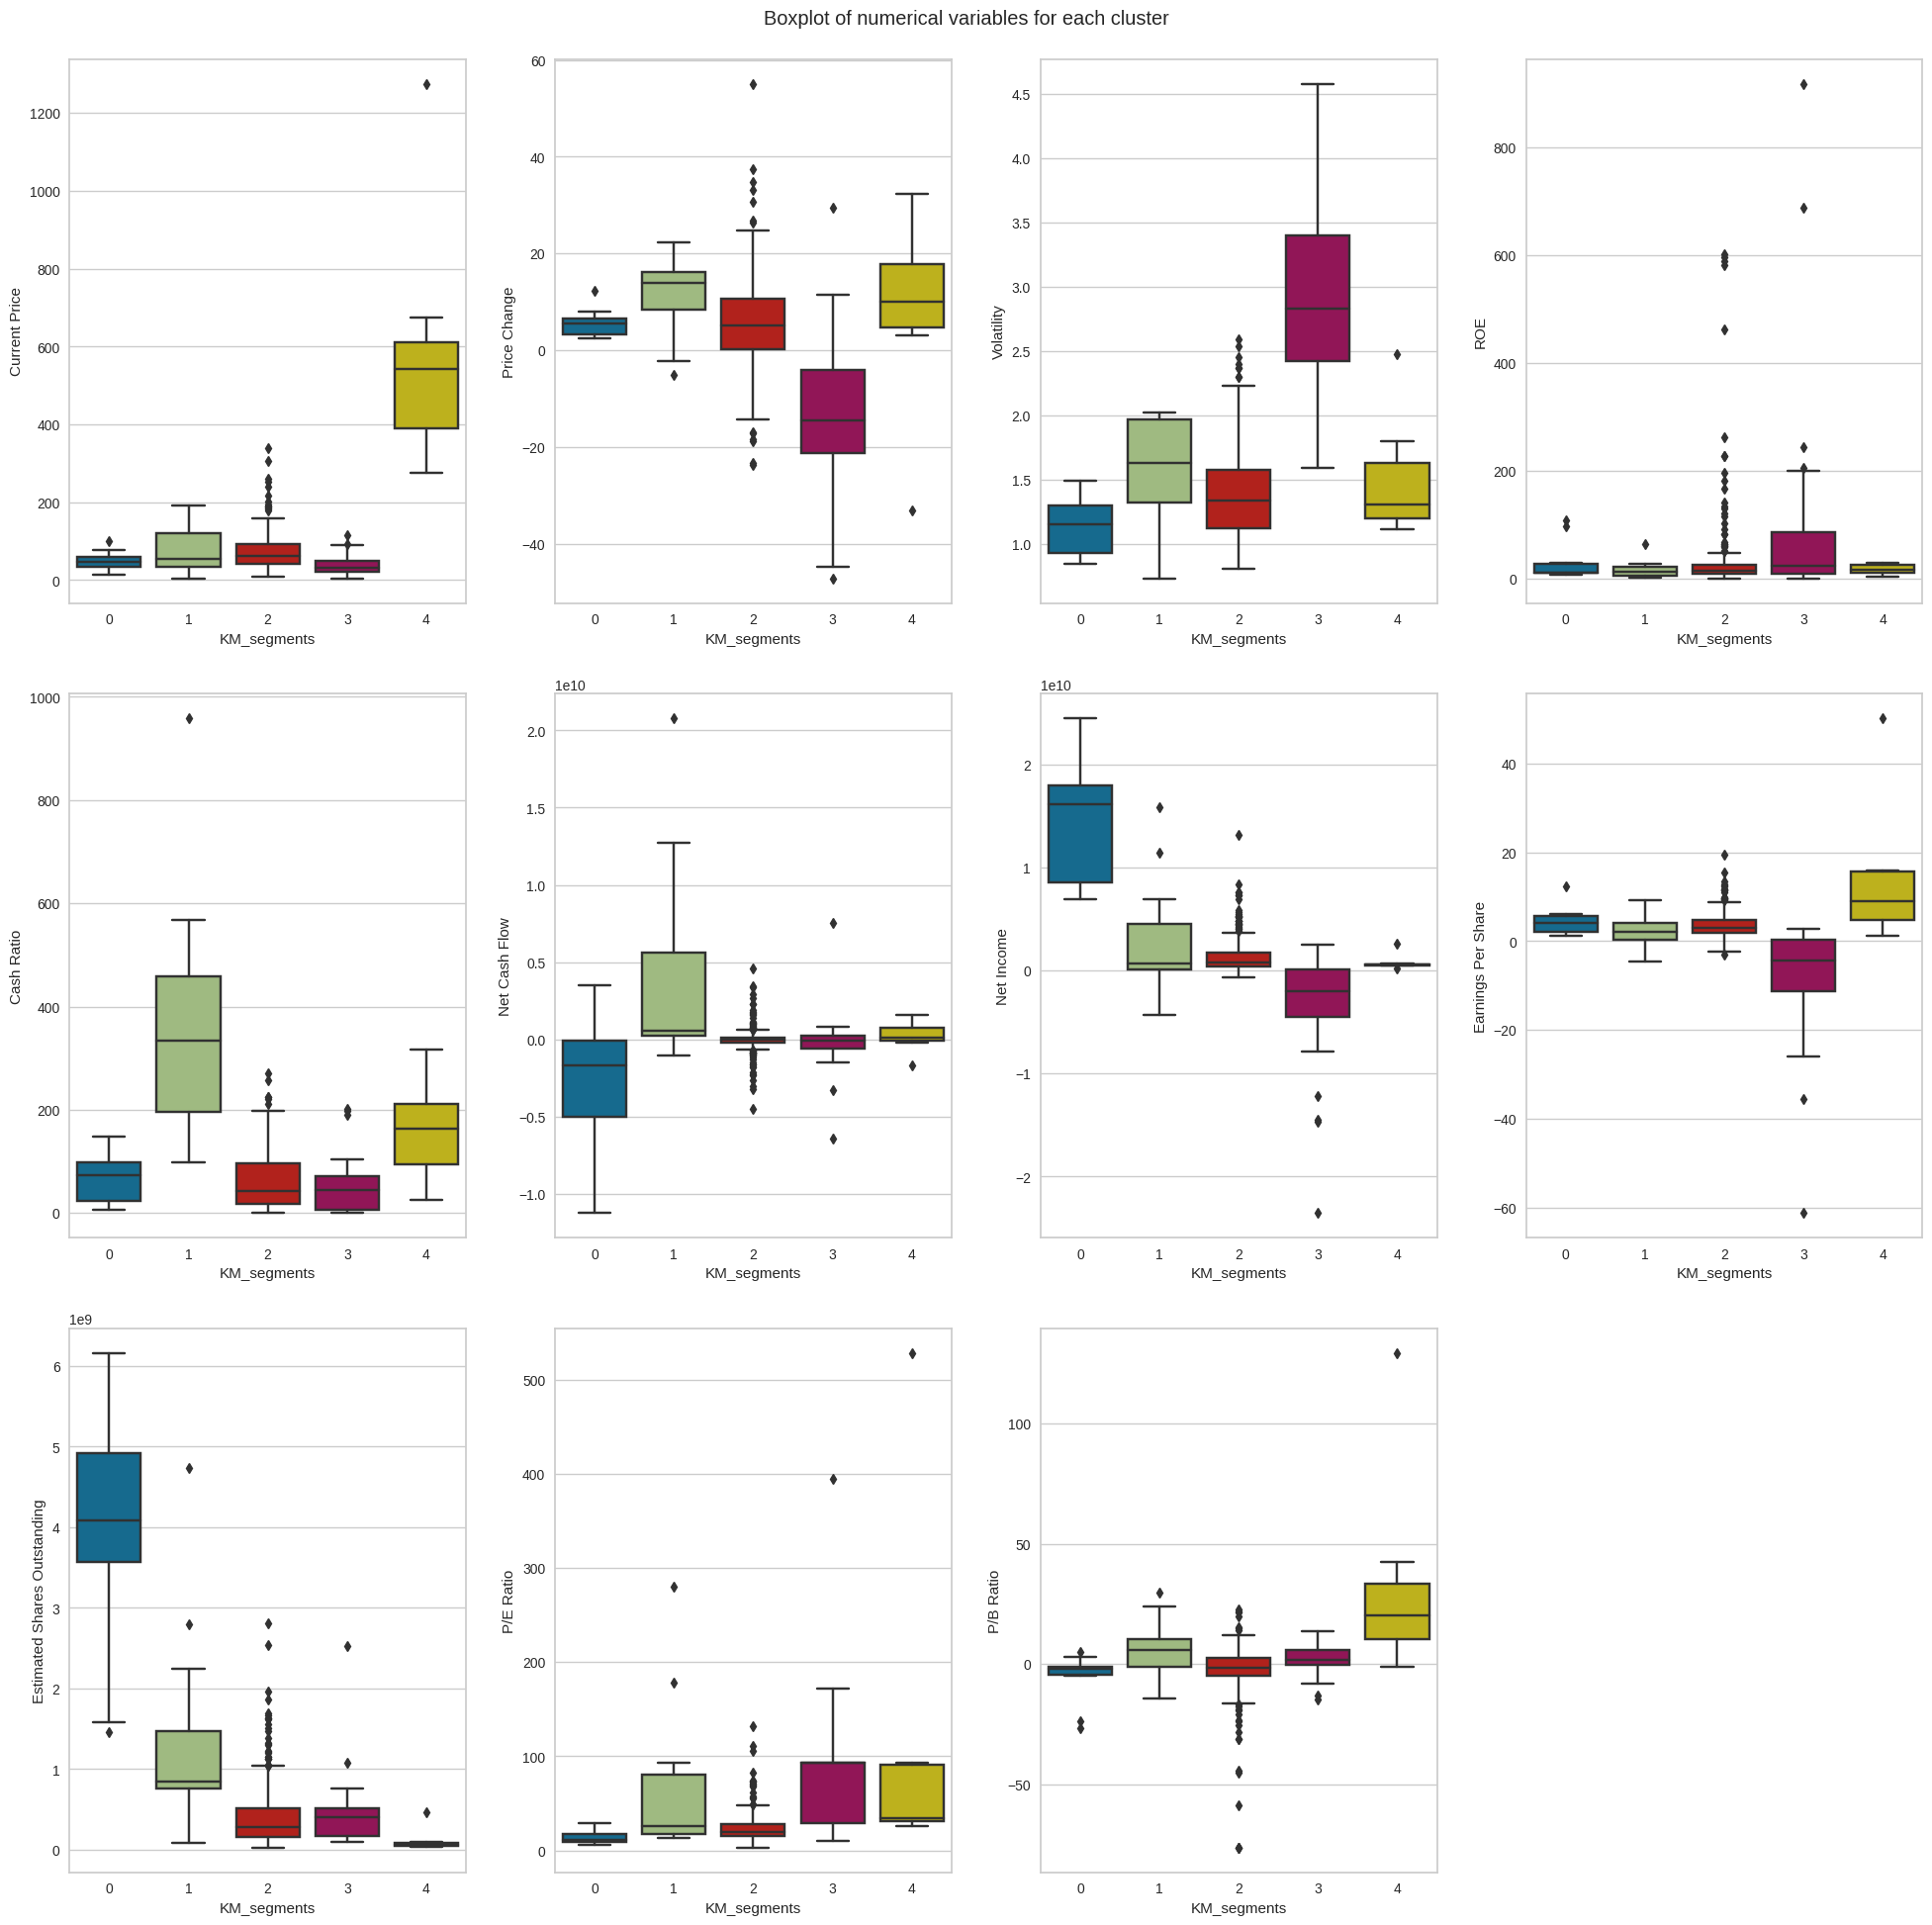

In [60]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

##KMeans Clusters
###Cluster 0 - "Most Stable and Most profitable Cluster"
11 stocks, comprised mostly of stocks within the Financials, Health Care, Information Technology (IT), and Consumer Discretionary sectors.

- Companies within this cluster have:
- Low volatility
- Most of the companies with the highest outflows of cash
- The highest net incomes
- The highest number of shares outstanding

###Cluster 1 - "Highest Cash ratio and profitable Cluster"

13 stocks, comprised mostly of stocks within the Healthcare and IT sectors.

Companies within this cluster have:
- Moderate volatility
- Mostly profitable
- Most of the highest cash ratios and cash inflows


###Cluster 2 - "Average stock Cluster"

280 stocks (~84% of all stocks in the dataset) drawn from all sectors present in the dataset.

Companies within this cluster have:
- Low P/E ratios
- Most of the outliers on negative P/B ratios


###Cluster 3 - "Low price but high volatility Cluster"

29 stocks, a vast majority of which are from the Energy sector.
Companies within this cluster have:
- Low stock prices, but high ROE
- High beta that is high volatility.
- Most of the most volatile stocks, especially those with outliers in price decreases
- Mostly negative net incomes and earnings per share

###Cluster 4 - "High Earnings for a High Price Cluster"

7 stocks, comprised mostly of stocks from the Health Care and Consumer Discretionary sectors.

Companies within this cluster have:
- Most of stocks with the highest prices
- Favorable cash ratios
- The most favorable P/B ratios
- Most of the highest earnings-per-share

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [61]:
hc_df = subset_scaled_df.copy()

In [62]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [63]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [64]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

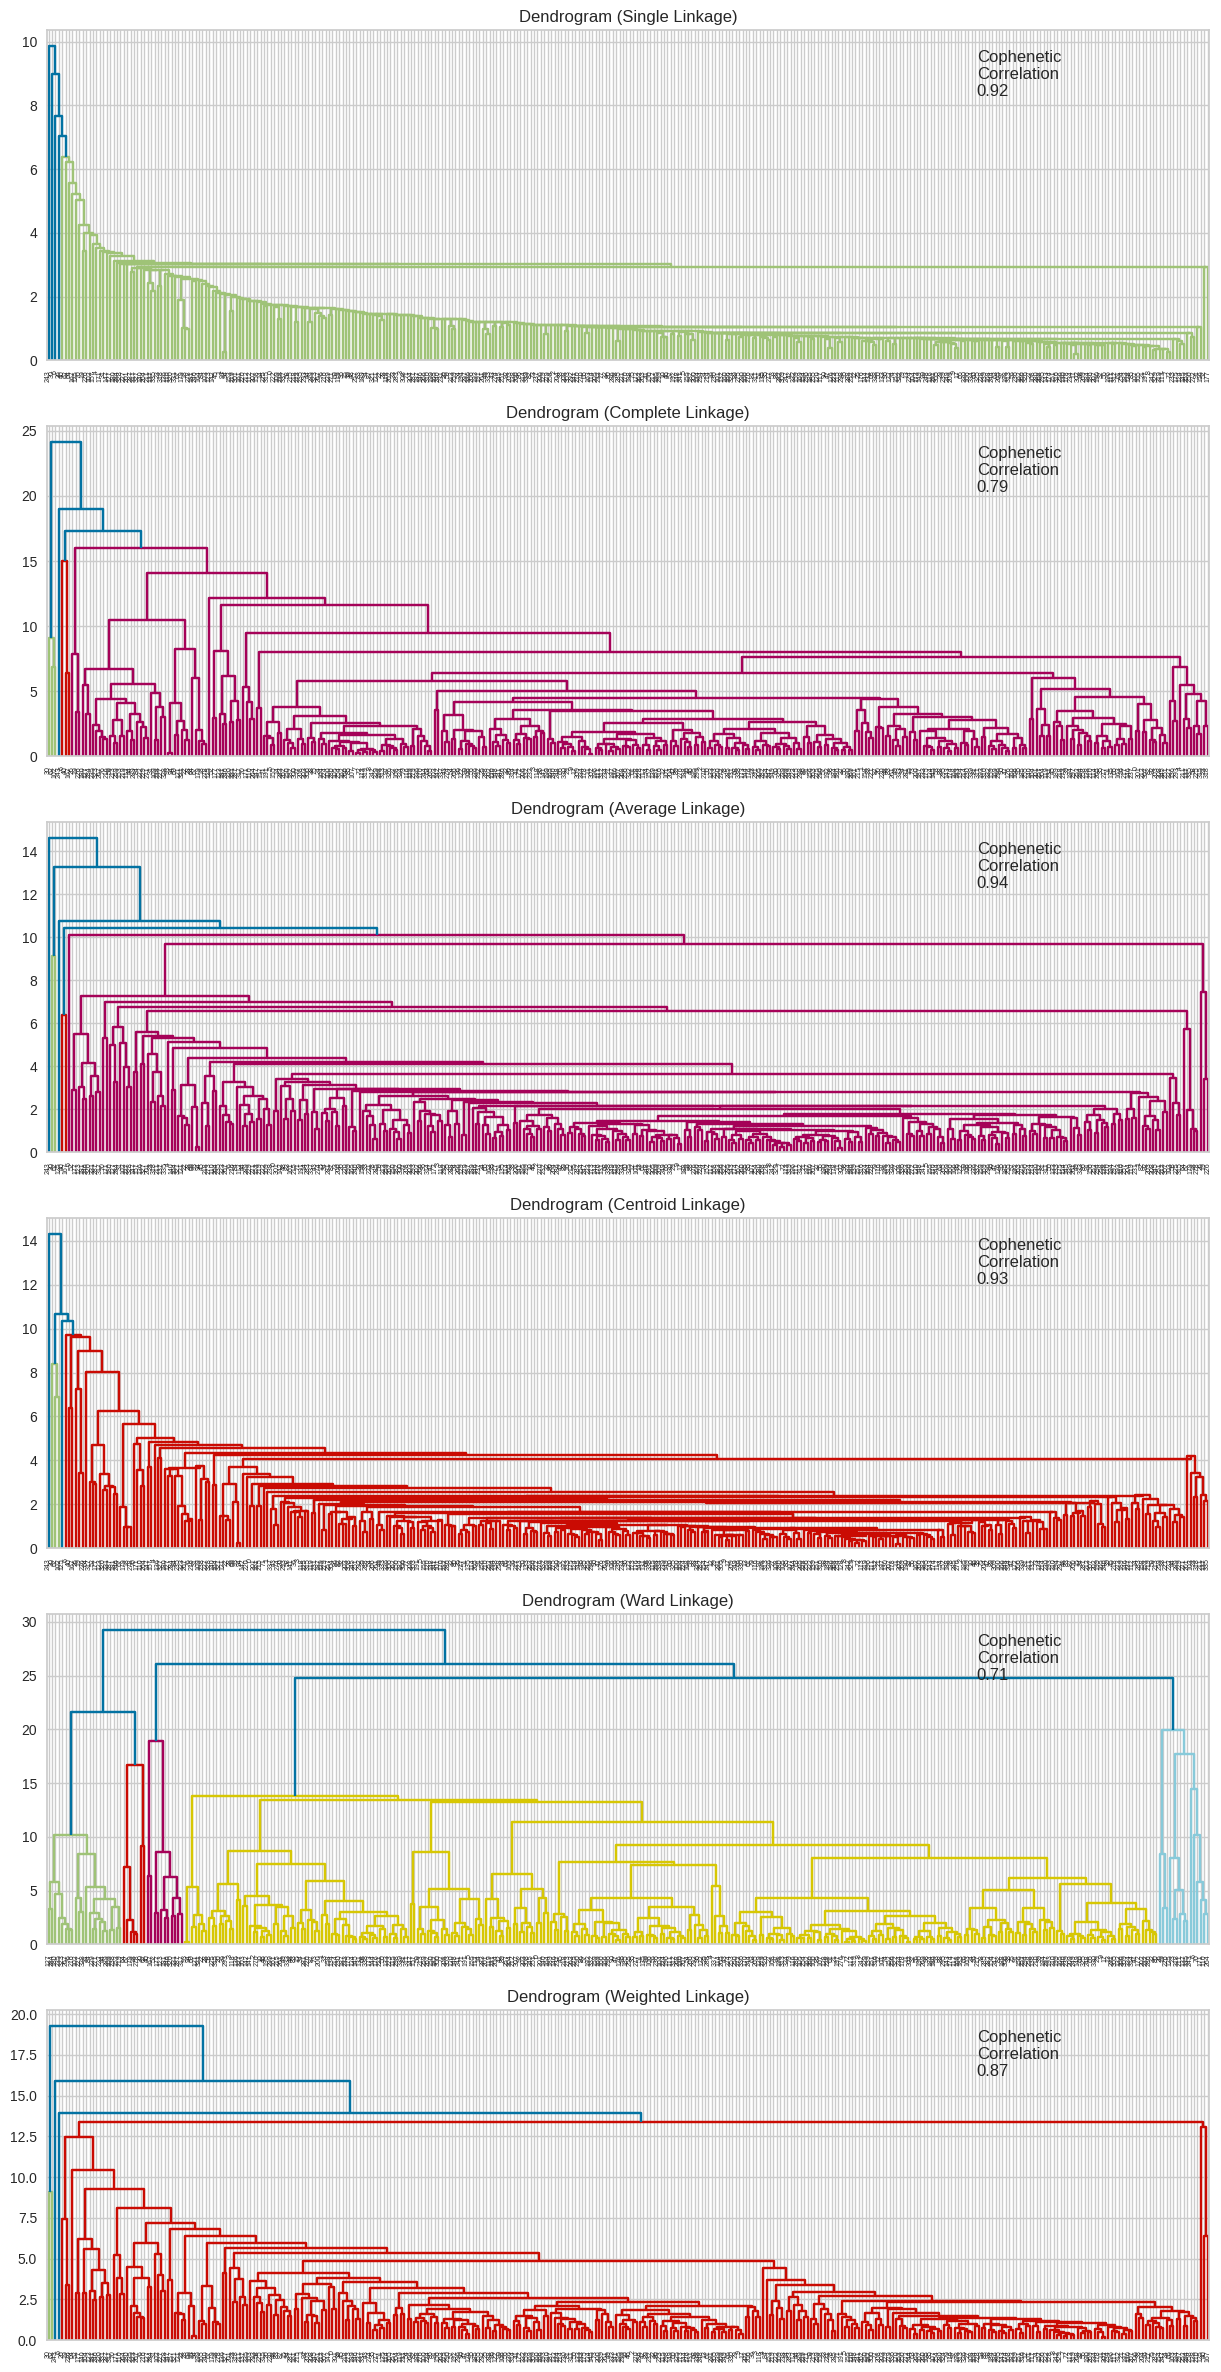

In [65]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

###Findings:
The cophenetic correlation is highest for average and centroid linkage methods, but the dendrogram for average appears to provide better clusters.

5 appears to be the appropriate number of clusters for the average linkage method

In [66]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


### Creating model using sklearn

In [67]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [68]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [69]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [70]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values )

In [71]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,77.884243,4.105986,1.516865,35.320359,66.775449,-32825817.365269,1535255703.592814,2.903308,559027333.145509,32.437511,-1.781988,334
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1


In [72]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Analog Devices, Inc.', ..., 'Yahoo Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 334
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 2, the following companies are present:
['Apache Corporation', 'Chesapeake Energy']
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 1, the following companies are present:
['Bank of America Corp', 'Intel Corp.']
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 3, the

In [73]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     48
             Health Care                    40
             Industrials                    53
             Information Technology         31
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Consumer Discretionary          0
             Consumer Staples                0
             Energy                          0
             Financials                      1
             Health Care                     0
             Industrials                     0
             Information Technology          1
             Materials                       0
             Real Estate                     0
             Teleco

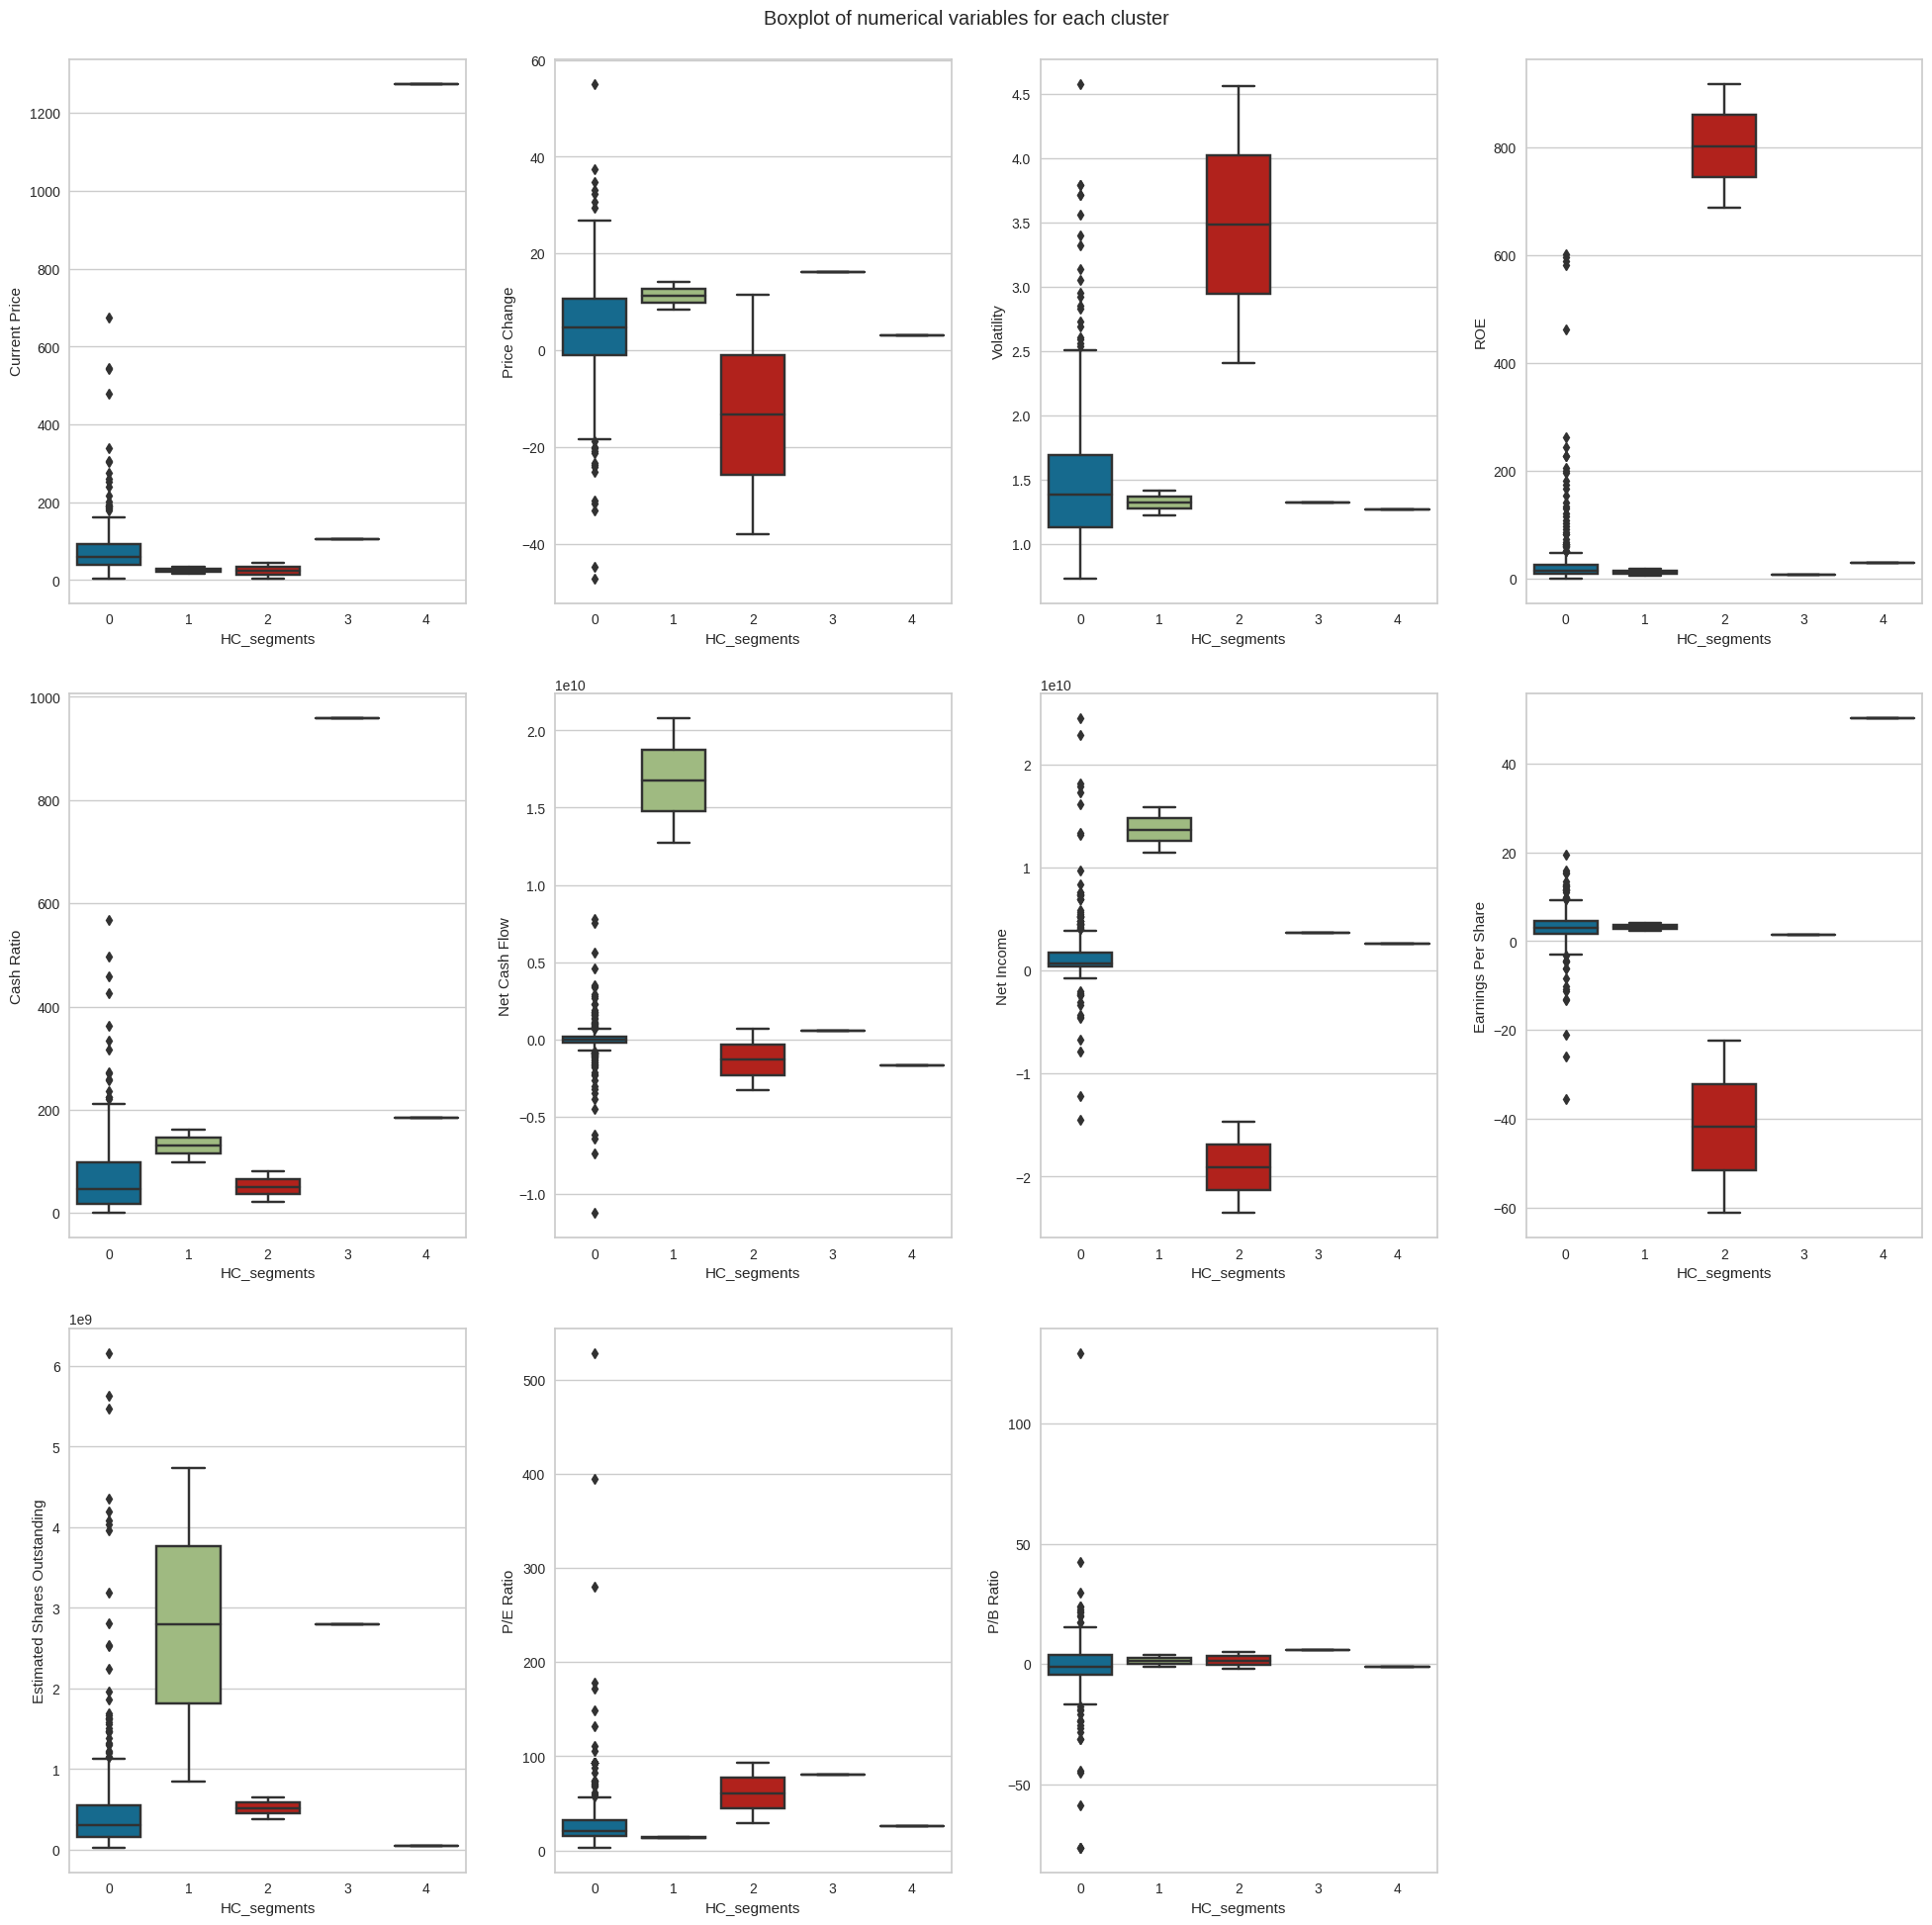

In [74]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

##Hierarchical Clusters
###Cluster 0 - Growth for a Price

15 stocks, comprised mostly of stocks within the Health Care, Information Technology (IT), and Consumer Discretionary sectors.
Companies within this cluster have:
- Most of stocks with the highest prices
- Significant outliers in price-to-equity ratio
- The most favorable price-to-book (P/B) ratios
- Most of the highest cash ratios

###Cluster 1 - Short-term Poor, Long-term Rich

7 stocks, comprised mostly of stocks within the Consumer Staples and Energy sectors.
Companies within this cluster have:
- The highest returns-on-equity
- The lowest net incomes
- Mostly negative earnings per share

###Cluster 2- DJIA

11 stocks, comprised mostly of stocks within the Financials and Telecommunications sectors
Companies within this cluster have:
- Most of the companies with the highest inflows and outflows of cash
- The highest net incomes
- The highest number of shares outstanding
###Cluster 3 - Diversification

285 stocks (~84% of all stocks in the dataset) drawn from all sectors present in the dataset
Companies within this cluster have:
- Most of outliers in price increases and some of the outliers in price decreases
- Some of outliers in cash inflows and outflows
- Most of the outliers in P/B ratio
###Cluster 4 - Energy-specific portfolio

22 stocks, a vast majority of which are in the Energy sector
Companies within this cluster have:
- Most of the most volatile stocks, especially those with outliers in price decreases
-Mostly negative net incomes and earnings per share

## K-means vs Hierarchical Clustering

### Comparing KMean and Hierachical Clustering


- How many clusters are obtained as the appropriate number of clusters from both algorithms?

 Finding:

 Using both the clustering techniques we find 5 clusters for both.

- Which clustering technique took less time for execution?

Finding:

Both the KMeans model and the Agglomerative Clustering model fit the dataset within ~0.1s

- Which clustering technique gave you more distinct clusters, or are they the same?

Finding:

Both algorithms give similar clusters, with a single cluster of a majority of the stocks and the remaining four clusters containing 7-29 stocks

- How many observations are there in the similar clusters of both algorithms?

Finding:

For both algorithms, both 5 clusters provided distinct clusters with sufficient observations. They are reasonably differentiate the type of stock they represent.



## Actionable Insights and Recommendations

-

###Actionable Insights and Recommendations:

- Trade&Ahead should first ascertain its clients' financial objectives, risk tolerance, and investing habits before suggesting a cluster of companies as a possible portfolio that would satisfy these requirements.

- These clusters could serve as a jumping off point for additional financial statement analysis by Trade&Ahead, allowing it to identify specific stocks that do not match the "profile" of the cluster.

- Trade&Ahead may be able to do buy and sell recommendations for their clients by identifying stocks characters and behaviours.  
- Trade&Ahead should collect the data in future and follow the same procedure and use it for future to identify stocks permanent pattern.

In [ ]:
!jupyter nbconvert --to html MT_Project_ReneWind_LearnerNotebook_FullCode\ \(1\).ipynb